In [1]:
#melakukan import library

import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import sys
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#melakukan load dataset
data = pd.read_csv('./dataset.csv', encoding='latin-1')

In [3]:
#melihat ukuran dari data
data.shape

(2335, 13)

In [4]:
#melihat 5 sample data teratas
data.sample(5)

,sample_name,is_text_section_available,additional_section,is_any_exec_section_besides_text,traverse_operation,encryption_using_windows_crypto_api,file_operation,internet_connection,known_packer_section,is_any_environtment_fingerprinting,encryption_using_custom_function,is_iat_available,label
490,efecf9bb87d641994cab084a0ad65397b193c7a6d00c65...,1,1,0,0,0,1,0,0,0,0,1,benign
1659,dcac04f022a457b3d293d41f25d9f9c28d7bad77520b31...,1,0,0,0,0,0,0,0,0,0,1,ransomware
1942,abc5ad9fe2047299d9c174d100ab06c59cabc1bb05f2e2...,1,0,0,0,0,0,0,0,0,0,1,ransomware
122,3cefaa966d5e204fe6601160e7ba4d27910437bd1e83b8...,1,1,0,0,0,0,0,0,0,0,1,benign
1750,f2ab74ce11c4462db427db65ff5755db4d5267d3731723...,1,0,0,0,0,0,0,0,0,0,1,ransomware


In [5]:
#melihat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   sample_name                          2335 non-null   object
 1   is_text_section_available            2335 non-null   int64 
 2   additional_section                   2335 non-null   int64 
 3   is_any_exec_section_besides_text     2335 non-null   int64 
 4   traverse_operation                   2335 non-null   int64 
 5   encryption_using_windows_crypto_api  2335 non-null   int64 
 6   file_operation                       2335 non-null   int64 
 7   internet_connection                  2335 non-null   int64 
 8   known_packer_section                 2335 non-null   int64 
 9   is_any_environtment_fingerprinting   2335 non-null   int64 
 10  encryption_using_custom_function     2335 non-null   int64 
 11  is_iat_available                     2335 n

In [6]:
#melihat jumlah null pada dataset
data.isnull().sum()

sample_name                            0
is_text_section_available              0
additional_section                     0
is_any_exec_section_besides_text       0
traverse_operation                     0
encryption_using_windows_crypto_api    0
file_operation                         0
internet_connection                    0
known_packer_section                   0
is_any_environtment_fingerprinting     0
encryption_using_custom_function       0
is_iat_available                       0
label                                  0
dtype: int64

In [7]:
#melihat deksripsi data
data.describe()

,is_text_section_available,additional_section,is_any_exec_section_besides_text,traverse_operation,encryption_using_windows_crypto_api,file_operation,internet_connection,known_packer_section,is_any_environtment_fingerprinting,encryption_using_custom_function,is_iat_available
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.0
mean,0.927195,0.504497,0.056531,0.184154,0.071092,0.322056,0.012420,0.006424,0.053961,0.116060,1.0
std,0.259872,0.500087,0.230994,0.387693,0.257034,0.467364,0.110773,0.079909,0.225990,0.320365,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [8]:
data['label'].value_counts()

ransomware    1389
benign         946
Name: label, dtype: int64

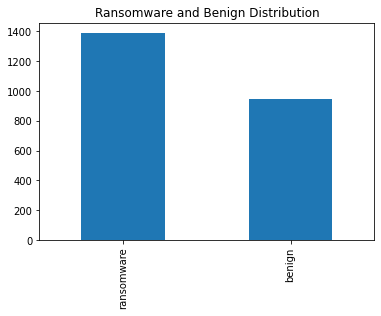

In [9]:
data['label'].value_counts().plot(kind='bar', title='Ransomware and Benign Distribution');

In [10]:
X = data.drop(['sample_name','label'], axis=1)
y = data['label']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[260  22]
 [  0 419]]
              precision    recall  f1-score   support

      benign       1.00      0.92      0.96       282
  ransomware       0.95      1.00      0.97       419

    accuracy                           0.97       701
   macro avg       0.98      0.96      0.97       701
weighted avg       0.97      0.97      0.97       701



In [15]:
accuracy = 100 * accuracy_score(y_test, y_pred)
print("Accuracy Decision Tree = " + str(accuracy))

Accuracy Decision Tree = 96.86162624821684


In [16]:
feature_cols = ['is_text_section_available', 'additional_section', 'is_any_exec_section_besides_text',
                  'traverse_operation', 'encryption_using_windows_crypto_api', 'file_operation', 'internet_connection',
                  'known_packer_section', 'is_any_environtment_fingerprinting', 'encryption_using_custom_function','is_iat_available']

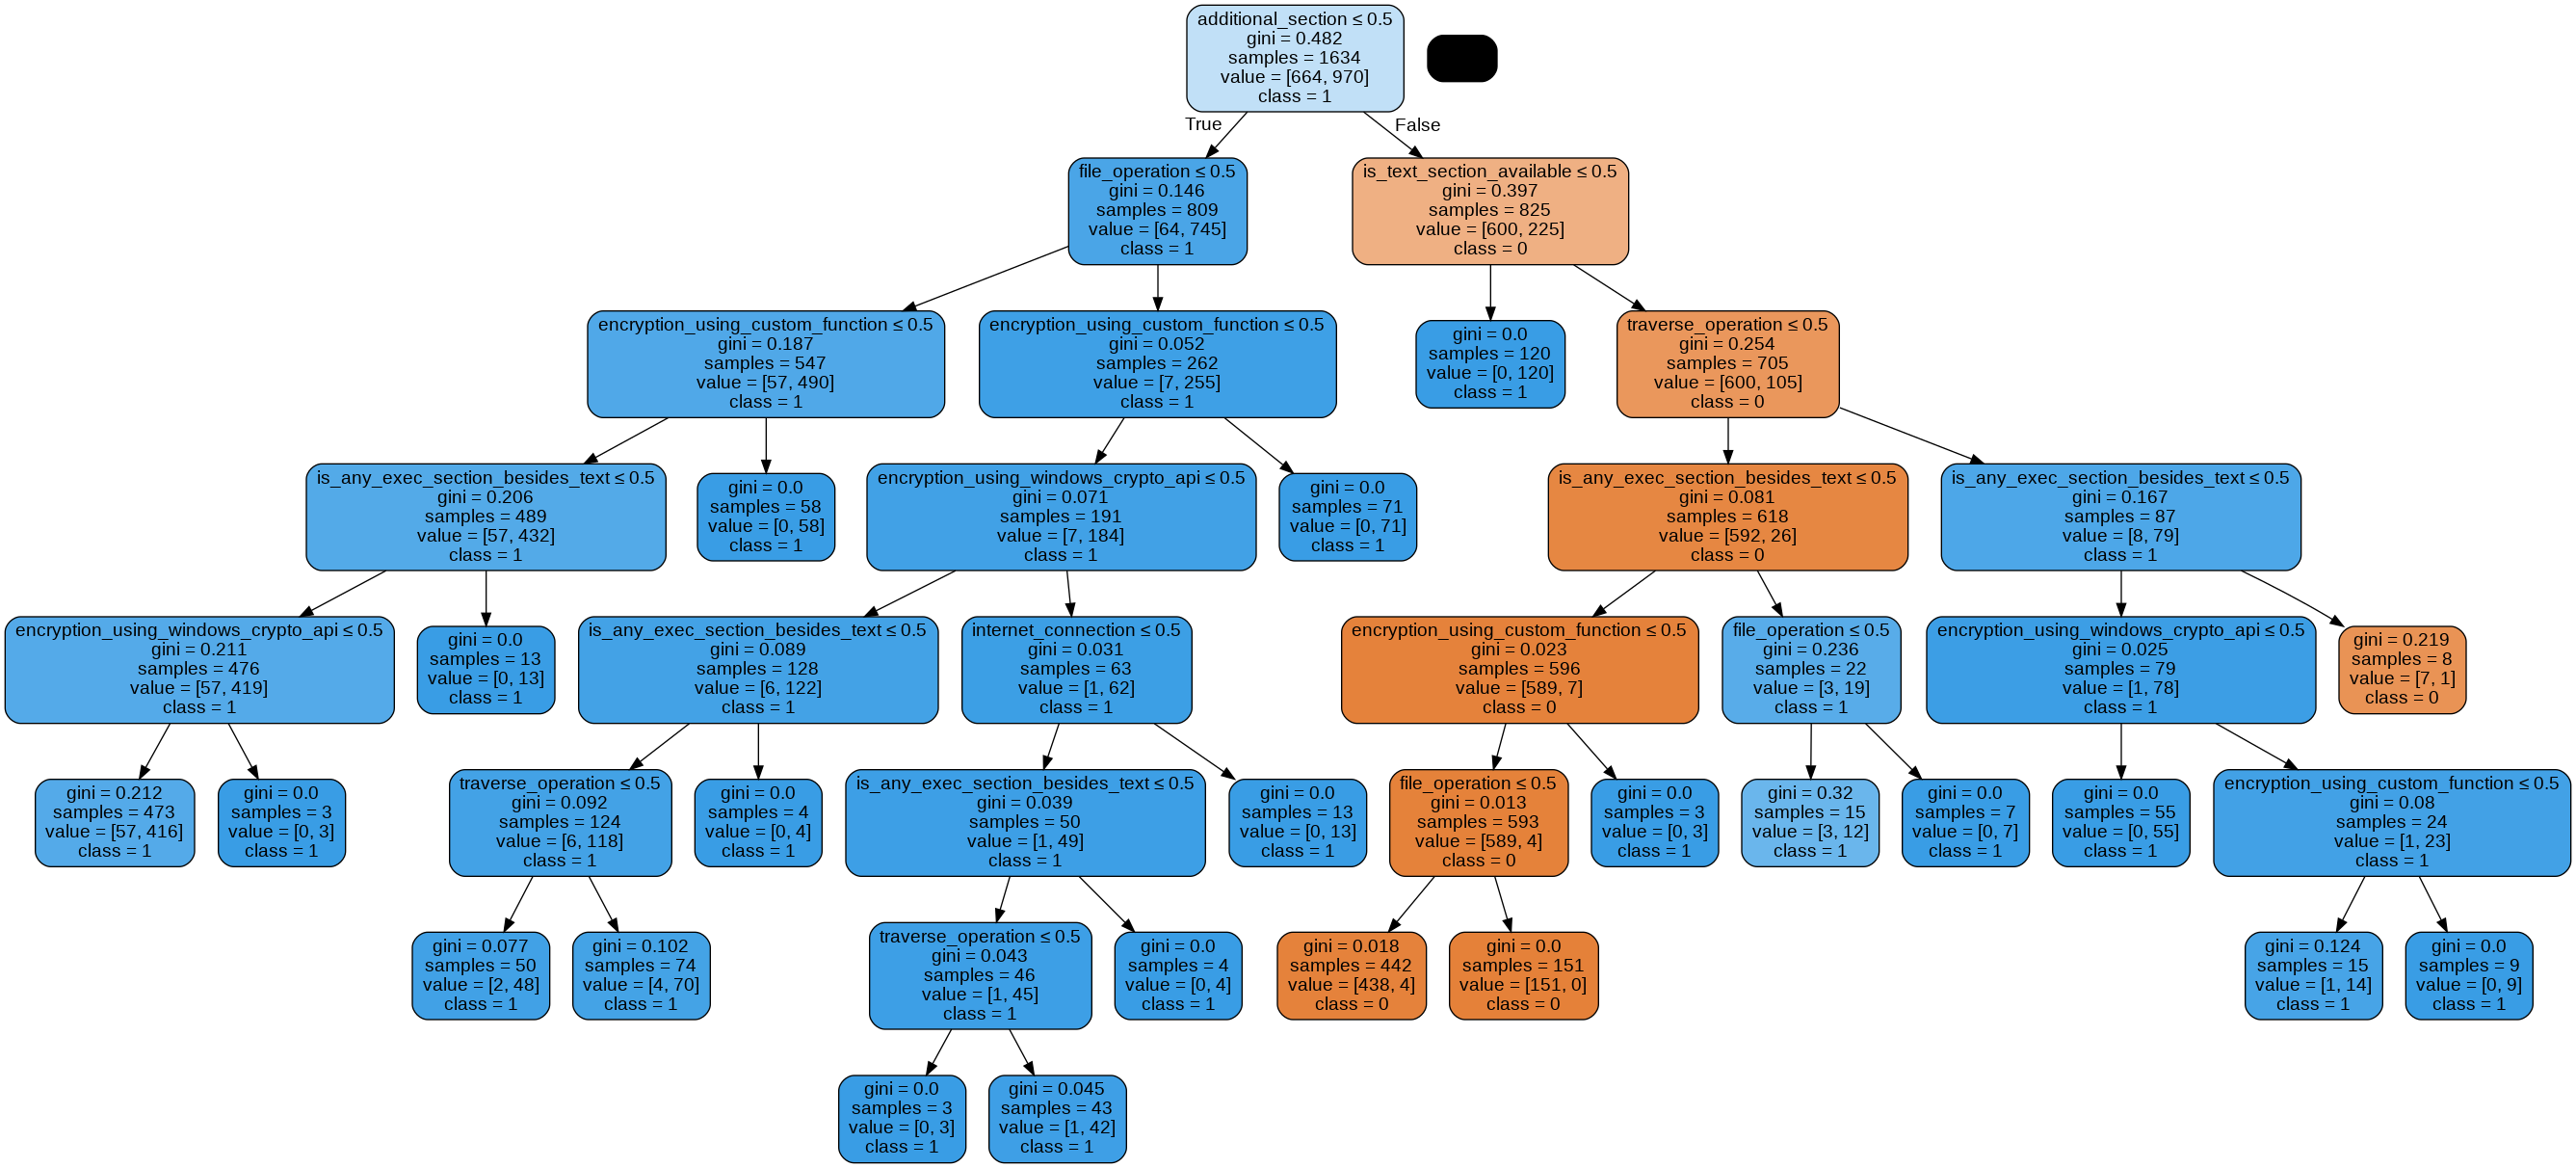

In [17]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vis_pengujian.png')
Image(graph.create_png())

In [18]:
#saving model
import pickle

with open('ransomware_dtmodel.pkl','wb') as f:
  pickle.dump(model,f)
